In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [147]:
train = pd.read_csv('Train.csv')
train.head()

,YearlyIncome,LoanPurpose,CreditRating,RequestedLoanAmount
0,189176,Business,480,50028.840100
1,172768,Business,774,28613.450092
2,59305,Personal,672,57138.880019
3,31308,Business,578,4687.380052
4,52212,Home,400,26460.830079


In [148]:
train.shape

(14700, 4)

In [149]:
train.isnull().sum()

YearlyIncome           0
LoanPurpose            0
CreditRating           0
RequestedLoanAmount    0
dtype: int64

In [150]:
train.duplicated().sum()

0

In [151]:
train.describe()

,YearlyIncome,CreditRating,RequestedLoanAmount
count,14700.000000,14700.000000,14700.000000
mean,109886.832381,576.229456,32978.126907
std,52099.376488,160.302444,18467.196486
min,20231.000000,300.000000,1013.000037
25%,64688.750000,436.000000,16975.435016
50%,109874.500000,577.000000,32984.760068
75%,155149.500000,717.000000,48968.515059
max,199945.000000,849.000000,64948.000025


In [152]:
test = pd.read_csv('Test.csv')
test.head()

,YearlyIncome,LoanPurpose,CreditRating,RequestedLoanAmount
0,151304,Car,495,NaN
1,86788,Business,636,NaN
2,64757,Personal,602,NaN
3,67540,Personal,715,NaN
4,42555,Personal,432,NaN


In [153]:
test.shape

(300, 4)

In [154]:
test.isnull().sum()

YearlyIncome             0
LoanPurpose              0
CreditRating             0
RequestedLoanAmount    300
dtype: int64

In [155]:
test.duplicated().sum()

0

In [156]:
combined = pd.concat([train, test], axis = 0)
combined.shape

(15000, 4)

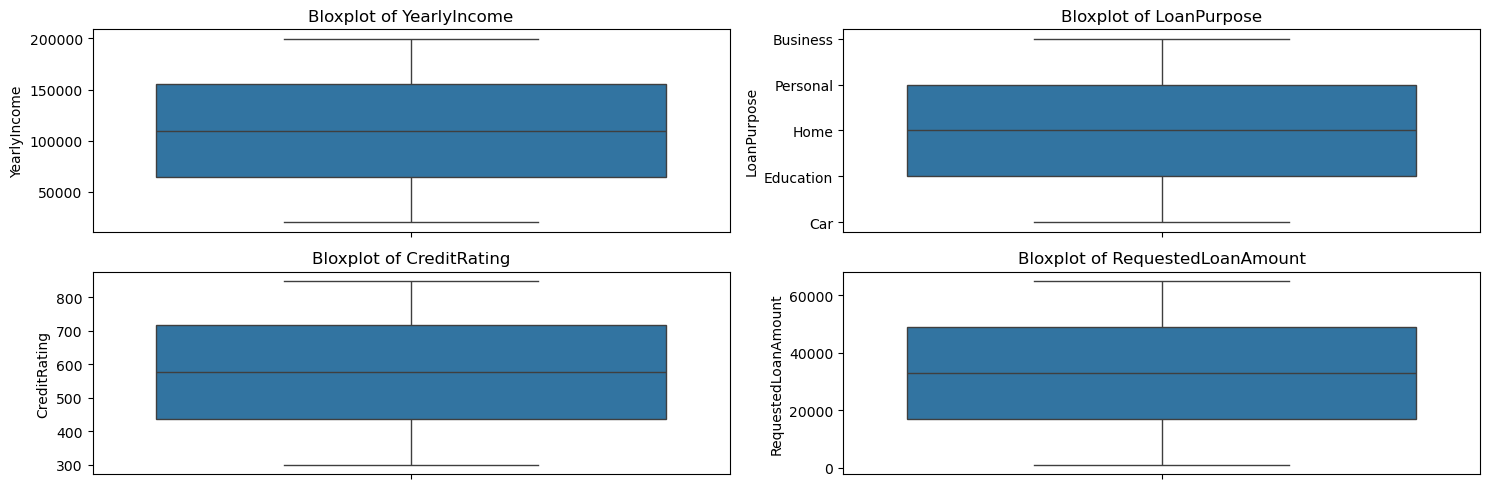

In [157]:
fig, axes = plt.subplots(2, 2, figsize=(15,5))
axes = axes.flatten()

for i, col in enumerate(train.columns):
    sns.boxplot(data = train, y=col, ax=axes[i])
    axes[i].set_title(f'Bloxplot of {col}')

plt.tight_layout()
plt.show()

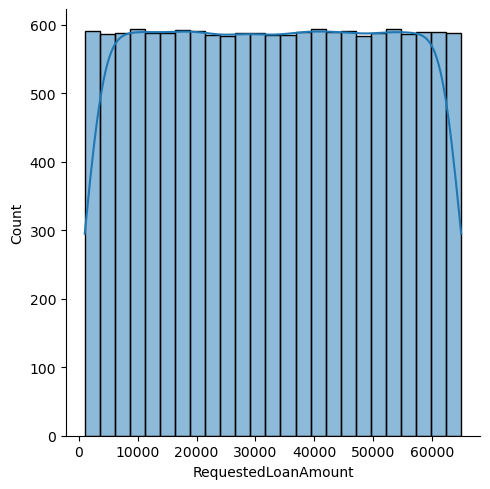

In [158]:
sns.displot(train['RequestedLoanAmount'], kde = True)

In [159]:
combined['LoanPurpose'].value_counts()

LoanPurpose
Personal     3084
Education    3054
Home         3000
Business     2966
Car          2896
Name: count, dtype: int64

In [160]:
combined['CreditRating'].describe()

count    15000.000000
mean       576.424600
std        160.313955
min        300.000000
25%        437.000000
50%        577.000000
75%        717.000000
max        849.000000
Name: CreditRating, dtype: float64

In [161]:
def credit(x):
    if x<= 499:
        return 1
    elif x>=500 and x<= 649:
        return 2
    elif x>= 650 and x<= 749:
        return 3
    else:
        return 4

In [162]:
combined['Credit_Score'] = combined['CreditRating'].apply(credit)

In [163]:
combined['Income_per_Credit'] = combined['YearlyIncome'] / combined['CreditRating']

In [164]:
combined['Income_Credit_Interaction'] = combined['YearlyIncome'] * combined['CreditRating']

In [165]:
le = LabelEncoder()
combined['LoanPurpose'] = le.fit_transform(combined['LoanPurpose'])

In [166]:
combined.head()

,YearlyIncome,LoanPurpose,CreditRating,RequestedLoanAmount,Credit_Score,Income_per_Credit,Income_Credit_Interaction
0,189176,0,480,50028.840100,1,394.116667,90804480
1,172768,0,774,28613.450092,4,223.214470,133722432
2,59305,4,672,57138.880019,3,88.251488,39852960
3,31308,0,578,4687.380052,2,54.166090,18096024
4,52212,3,400,26460.830079,1,130.530000,20884800


In [167]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearlyIncome               15000 non-null  int64  
 1   LoanPurpose                15000 non-null  int32  
 2   CreditRating               15000 non-null  int64  
 3   RequestedLoanAmount        14700 non-null  float64
 4   Credit_Score               15000 non-null  int64  
 5   Income_per_Credit          15000 non-null  float64
 6   Income_Credit_Interaction  15000 non-null  int64  
dtypes: float64(2), int32(1), int64(4)
memory usage: 878.9 KB


In [168]:
newtrain = combined.iloc[0:14700, : ]
newtest = combined.iloc[14700:, : ]

In [169]:
newtest = newtest.drop('RequestedLoanAmount', axis = 1)

In [170]:
newtrain.shape

(14700, 7)

In [171]:
newtest.shape

(300, 6)

In [172]:
correlation_matrix = newtrain.corr()
target_corr = correlation_matrix["RequestedLoanAmount"].sort_values(ascending=False)
print(target_corr)

RequestedLoanAmount          1.000000
LoanPurpose                  0.015362
Credit_Score                -0.000391
CreditRating                -0.002220
Income_Credit_Interaction   -0.003215
Income_per_Credit           -0.004258
YearlyIncome                -0.005691
Name: RequestedLoanAmount, dtype: float64


In [202]:
newtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14700 entries, 0 to 14699
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearlyIncome               14700 non-null  int64  
 1   LoanPurpose                14700 non-null  int32  
 2   CreditRating               14700 non-null  int64  
 3   RequestedLoanAmount        14700 non-null  float64
 4   Credit_Score               14700 non-null  int64  
 5   Income_per_Credit          14700 non-null  float64
 6   Income_Credit_Interaction  14700 non-null  int64  
dtypes: float64(2), int32(1), int64(4)
memory usage: 861.3 KB


In [204]:
newtrain = newtrain[['RequestedLoanAmount',  'LoanPurpose', 'Credit_Score']]
newtest = newtest[[ 'LoanPurpose', 'Credit_Score']]

In [206]:
x = newtrain.drop('RequestedLoanAmount', axis = 1)
y = newtrain['RequestedLoanAmount']

In [208]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [210]:
models = {'Linear Regression': LinearRegression(), 'Random Forest': RandomForestRegressor(), 'CatBoost' : CatBoostRegressor(),
         'Bagging': BaggingRegressor(), 'Extra Tree': ExtraTreesRegressor(), 'LightGBM': LGBMRegressor(), 'Lasso' : Lasso(),
         'Gradient Boosting': GradientBoostingRegressor(), 'Adaboost': AdaBoostRegressor(), 'Ridge' : Ridge(),
         'XGB': XGBRegressor()}

In [212]:
def evaluate_models(x_train, x_test, y_train, y_test, models):
    results = {}
    for name, model in models.items():
        predictions = model.fit(x_train, y_train).predict(x_test)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        results[name] = rmse
    return results

In [214]:
results = evaluate_models(x_train, x_test, y_train, y_test, models)

Learning rate set to 0.060437
0:	learn: 18399.3991886	total: 3.92ms	remaining: 3.91s
1:	learn: 18398.1367405	total: 7.19ms	remaining: 3.59s
2:	learn: 18397.5568062	total: 9.33ms	remaining: 3.1s
3:	learn: 18396.8803100	total: 11.9ms	remaining: 2.96s
4:	learn: 18395.9546725	total: 15.2ms	remaining: 3.03s
5:	learn: 18395.0164417	total: 18.8ms	remaining: 3.11s
6:	learn: 18394.5756567	total: 20.7ms	remaining: 2.94s
7:	learn: 18393.9852891	total: 24.2ms	remaining: 3s
8:	learn: 18393.5565349	total: 26.6ms	remaining: 2.93s
9:	learn: 18393.0715310	total: 29.9ms	remaining: 2.96s
10:	learn: 18392.7612413	total: 32.6ms	remaining: 2.93s
11:	learn: 18392.2840399	total: 36.7ms	remaining: 3.02s
12:	learn: 18392.0147392	total: 38.6ms	remaining: 2.93s
13:	learn: 18391.6624570	total: 43ms	remaining: 3.03s
14:	learn: 18391.5048931	total: 46.3ms	remaining: 3.04s
15:	learn: 18391.0636212	total: 50.5ms	remaining: 3.11s
16:	learn: 18390.9125004	total: 52.1ms	remaining: 3.01s
17:	learn: 18390.7826195	total: 54

In [216]:
best_model_name = min(results, key = results.get)
best_model = models[best_model_name]

In [218]:
print(f"best model is {best_model_name} with rmse {results[best_model_name]}")

best model is Lasso with rmse 18727.01533587602


In [220]:
y_pred = best_model.fit(x_train, y_train).predict(x_test)

In [222]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

18727.01533587602


In [226]:
x_train = newtrain.drop('RequestedLoanAmount', axis = 1)
y_train = newtrain['RequestedLoanAmount']
x_test = newtest
y_pred = best_model.fit(x_train, y_train).predict(x_test)

In [228]:
solution = pd.DataFrame({'RequestedLoanAmount': y_pred})
solution.head()

,RequestedLoanAmount
0,32776.079677
1,32573.621670
2,33373.322421
3,33370.789602
4,33375.855241


In [230]:
solution.to_csv('Solution.csv', index = False)